In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:10pt;}
div.text_cell_render.rendered_html{font-size:11pt;}
div.output {font-size:10pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:10px;}
</style>
"""))

<b><font size="6" color="red">Ch.2 한글 자연어 처리 - 형태소 분석</font><b>

# 1. 자연어 처리
- 자연어 : 일상적인 언어
- 자연어 처리 분야
    * 자연어 이해 : 형태소 분석 → pos-tagging (품사 태깅)
    * 자연어 이해 & 생성 알고리즘 : RNN/LSTM/GRU → seq2seq → 트랜스포머
- 활용 분야: 트렌드 분석, 탐색적 분석, 맞춤법 검사, 번역기, 챗봇
# 2. 자연어 이해/생성 처리 절차
- 전처리: 단어/어절 추출(특수문자, ㅎㅎ, ^^ 등 제외)
- 분석 후보 생성: 형태소 분리, 품사태깅
- 제약 조건: 불용어 처리, 규칙 확인
- 분석: 시각화(워드클라우드, Test), 유사성 분석, 연관 분석, RNN/LSTM/GRU, ...
# 3. 형태소 분석 엔진
- Konlpy : (아래 4개 모두) java로 만든 형태소 분석기(JAVA_HOME 환경변수, Path 설정)
    * HanNanum 
    * Kkma
    * Komoran
    * Okt
- Mecab
    * Mecab : C++로 만든 형태소 분석기. 저사양환경에서 사용 가능
- 공통 기능: morphs(형태소 나누기), nouns(명사 추출), pos(형태소로 나누어 품사 태그)
- pos tagging chat 다운로드
    - 구글에서 konlpy docs -> https://konlpy.org/en/latest/
    - api 메뉴 -> "Comparison between POS tagging classes" 클릭 ->
    - "Korean POS tags comparison chart 다운로드

In [ ]:
%pip install konlpy

In [ ]:
%pip show konlpy

In [ ]:
%pip install python-mecab-ko

In [ ]:
%pip show python-mecab-ko

In [ ]:
%pip install wordcloud

In [ ]:
%pip show wordcloud

In [ ]:
%pip install gensim

In [ ]:
%pip show gensim

In [2]:
import os
os.environ.get('JAVA_HOME')

'C:\\Program Files\\Java\\jdk-17'

In [3]:
import konlpy
konlpy.__version__ #에러나는 경우 jpype1 라이브러리를 수동 설치(현 버전에서는 x)

'0.6.0'

In [2]:
text = "아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다."

## 3.1. HanNanum

In [3]:
from konlpy.tag import Hannanum
hannanum = Hannanum(jvmpath=None) # default 1024(m), gb 이상에선 '1g'로 표기
# 입력된 텍스트를 가장 세밀하게 분석해서, 형태소 품사 원형 등의 후보군을 모두 반환
hannanum.analyze(text)

[[[('아름답', 'paa'), ('지만', 'ecs')],
  [('아름답', 'paa'), ('지', 'ecs'), ('만', 'jxc')],
  [('아름답', 'paa'), ('지', 'ecx'), ('말', 'px'), ('ㄴ', 'etm')]],
 [[('다소', 'mag')], [('다소', 'ncn')]],
 [[('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncn'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'jxc')],
  [('복잡', 'ncps'), ('하기', 'ncn'), ('도', 'ncn')],
  [('복잡', 'ncps'), ('하', 'xsms'), ('기', 'etn'), ('도', 'jxc')]],
 [[('하', 'pvg'), ('ㄴ', 'etm')],
  [('한', 'nnc')],
  [('한', 'ncn')],
  [('한', 'nbn')],
  [('하', 'px'), ('ㄴ', 'etm')]],
 [[('한국어', 'ncn'), ('는', 'jxc')]],
 [[('전세계', 'ncn'), ('에서', 'jca')],
  [('전세', 'ncn'), ('계', 'ncn'), ('에서', 'jca')],
  [('전', 'xp'), ('세계', 'ncn'), ('에서', 'jca')]],
 [[('13', 'nnc'), ('번', 'nbu'), ('째', 'xsnu'), ('로', 'jca')]],
 [[('많', 'paa'), ('이', 'xsa')], [('많이', 'mag')]],
 [[('사용', 'ncpa'), ('되', 'xsvn'), ('는', 'etm')]],
 [[('언어', 'ncn'), ('이', 'jp'), ('ㅂ니다', 'ef')]],
 [[('.', 'sf')], [('.', 'sy')]]]

In [6]:
# 형태소 분석 : morphs
print(hannanum.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '하', 'ㄴ', '한국어', '는', '전세계', '에서', '13번', '째', '로', '많', '이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [7]:
# 명사만 추출 : nouns
print(hannanum.nouns(text))

['복잡', '한국어', '전세계', '13번', '사용', '언어']


In [4]:
# 품사 태그 : pos
print(hannanum.pos(text, ntags=22)) # natags default: 9 # 가장 단순한 분류

[('아름답', 'PA'), ('지만', 'EC'), ('다소', 'MA'), ('복잡', 'NC'), ('하', 'XS'), ('기', 'ET'), ('도', 'JX'), ('하', 'PV'), ('ㄴ', 'ET'), ('한국어', 'NC'), ('는', 'JX'), ('전세계', 'NC'), ('에서', 'JC'), ('13', 'NN'), ('번', 'NB'), ('째', 'XS'), ('로', 'JC'), ('많', 'PA'), ('이', 'XS'), ('사용', 'NC'), ('되', 'XS'), ('는', 'ET'), ('언어', 'NC'), ('이', 'JP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [5]:
# Quiz 1. post tag 결과에서 명사(NC, NQ, NB, NN)만 추출하기
tagged_text = hannanum.pos(text, ntags=22)
[token for token, tag in tagged_text if tag in ('NC', 'NQ', 'NB', 'NN')]

['복잡', '한국어', '전세계', '13', '번', '사용', '언어']

In [6]:
# Quiz 2. text에서 보통명사(NC)만 추출하기
[token for token, tag in tagged_text if tag == 'NC']

['복잡', '한국어', '전세계', '사용', '언어']

In [7]:
# Quiz 3. text에서 형용사(PA)만 추출하기
[token for token, tag in tagged_text if tag == 'PA']

['아름답', '많']

## 3.2. Kkma

In [8]:
from konlpy.tag import Kkma
kkma = Kkma()
# 형태소 분석
print(kkma.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전세계', '에서', '13', '번째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [10]:
# 명사 추출
print(kkma.nouns(text))

['복잡', '한국어', '전세계', '13', '13번째', '번째', '사용', '언어']


In [11]:
# 품사 태그
print(kkma.pos(text))

[('아름답', 'VA'), ('지만', 'ECE'), ('다소', 'MAG'), ('복잡', 'NNG'), ('하', 'XSV'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MDN'), ('한국어', 'NNG'), ('는', 'JX'), ('전세계', 'NNG'), ('에서', 'JKM'), ('13', 'NR'), ('번째', 'NNB'), ('로', 'JKM'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETD'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')]


In [13]:
# 품사 태그를 통해 명사(NNG, NNP, NNB, NNM, NR, NP) 만 추출
tagged_text = kkma.pos(text) # default ntags=56. 다른 ntags는 쓸 수 없다. (아마도 자바에서는 쓰겠지만)
[token for token, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB', 'NNM', 'NR', 'NP')]

['복잡', '한국어', '전세계', '13', '번째', '사용', '언어']

In [14]:
# 품사 태그를 통해 보통명사(NNG)만 추출
[token for token, tag in tagged_text if tag=='NNG']

['복잡', '한국어', '전세계', '사용', '언어']

## 3.3. Komoran

In [15]:
text = "아름답지만 다소 복잡하기도 한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다."

In [17]:
from konlpy.tag import Komoran
komoran = Komoran()
#형태소 분석
print(komoran.morphs(text))

['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '이', 'ㅂ니다', '.']


In [18]:
# 명사 추출
print(komoran.nouns(text))

['한국어', '전', '세계', '번', '사용', '언어']


In [19]:
# 품사 태깅
tagged_text = komoran.pos(text) #Komoran도 ntags 쓸 수 없음
print(tagged_text)

[('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNP'), ('는', 'JX'), ('전', 'NNG'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNB'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EF'), ('.', 'SF')]


In [21]:
# 품사 태그 이용해 명사(NNG, NNB, NNP, NR, NP)만 추출
[token for token, tag in tagged_text if tag in ('NNG', 'NNB', 'NNP', 'NR', 'NP')]

['한국어', '전', '세계', '번', '사용', '언어']

## 3.4. Twitter (Okt: Open Korean Text)
- SNS 자연어 텍스트 분석용 개발

In [27]:
%%time
from konlpy.tag import Okt #Twitter
okt = Okt()
#print('명사구 추출: ', okt.phrases(text))
print('형태소 추출: ', okt.morphs(text))
print('명사 추출: ', okt.nouns(text))
tagged_text = okt.pos(text)
print('품사 태깅: ', tagged_text)
print('품사 태깅을 이용한 명사 추출: ', [token for token, tag in tagged_text if tag=='Noun'])

형태소 추출:  ['아름답지만', '다소', '복잡하기도', '한', '한국어', '는', '전세계', '에서', '13', '번', '째', '로', '많이', '사용', '되는', '언어', '입니다', '.']
명사 추출:  ['다소', '한국어', '전세계', '번', '사용', '언어']
품사 태깅:  [('아름답지만', 'Adjective'), ('다소', 'Noun'), ('복잡하기도', 'Adjective'), ('한', 'Verb'), ('한국어', 'Noun'), ('는', 'Josa'), ('전세계', 'Noun'), ('에서', 'Josa'), ('13', 'Number'), ('번', 'Noun'), ('째', 'Suffix'), ('로', 'Josa'), ('많이', 'Adverb'), ('사용', 'Noun'), ('되는', 'Verb'), ('언어', 'Noun'), ('입니다', 'Adjective'), ('.', 'Punctuation')]
품사 태깅을 이용한 명사 추출:  ['다소', '한국어', '전세계', '번', '사용', '언어']
CPU times: total: 46.9 ms
Wall time: 14.4 ms


## 3.5. Mecab
- pip install python-mecab-ko
- 압도적 속도(konlpy 대비 약 5배 혹은 이상)
- 낮은 메모리 사용량
- 형태소 분해 정확도 높음

In [28]:
%%time
from mecab import MeCab
mecab = MeCab()
print('형태소 추출: ', mecab.morphs(text))
print('명사 추출: ', mecab.nouns(text))
tagged_text = mecab.pos(text)
print('품사 태깅: ', tagged_text)
print('품사 태깅을 이용한 명사 추출: ', [token for token, tag in tagged_text if tag in ('NNG', 'NNP', 'NNB', 'NNBC', 'NR', 'NP')])

형태소 추출:  ['아름답', '지만', '다소', '복잡', '하', '기', '도', '한', '한국어', '는', '전', '세계', '에서', '13', '번', '째', '로', '많이', '사용', '되', '는', '언어', '입니다', '.']
명사 추출:  ['한국어', '세계', '번', '사용', '언어']
품사 태깅:  [('아름답', 'VA'), ('지만', 'EC'), ('다소', 'MAG'), ('복잡', 'XR'), ('하', 'XSA'), ('기', 'ETN'), ('도', 'JX'), ('한', 'MM'), ('한국어', 'NNG'), ('는', 'JX'), ('전', 'MM'), ('세계', 'NNG'), ('에서', 'JKB'), ('13', 'SN'), ('번', 'NNBC'), ('째', 'XSN'), ('로', 'JKB'), ('많이', 'MAG'), ('사용', 'NNG'), ('되', 'XSV'), ('는', 'ETM'), ('언어', 'NNG'), ('입니다', 'VCP+EF'), ('.', 'SF')]
품사 태깅을 이용한 명사 추출:  ['한국어', '세계', '번', '사용', '언어']
CPU times: total: 15.6 ms
Wall time: 13.8 ms


# 4. 말뭉치

In [30]:
# 영어 말뭉치
import nltk
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
emma[:20]

'[Emma by Jane Austen'

In [33]:
# 한글 말뭉치
from konlpy.corpus import kolaw
#C:\Users\Admin\anaconda3\envs\ml-dl-nlp\Lib\site-packages\konlpy\data\corpus\kolaw
#data = kolaw.open('constitution.txt').readlines() #한 줄씩 list로 반환
data = kolaw.open('constitution.txt').read()
print('글자수: ', len(data))

글자수:  18884


# 5. Wordcloud
- pip install wordcloud

In [34]:
nouns = ['word1', 'word2', 'word1', 'word2']
' '.join(nouns)

'word1 word2 word1 word2'

In [37]:
# emma 말뭉치에서 (특수문자 제외)단어 추출 → 명사(NN, NNS, NNP, NNPS) 추출 → 연결 → 워드클라우드
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
# 단어 추출
ret = RegexpTokenizer('\w{2,}')
words = ret.tokenize(emma)
# pos-tagging → 명사 추출
emma_tags = pos_tag(words)
noun_list = [token for token, tag in emma_tags if tag in ('NN', 'NNS', 'NNP', 'NNPS')]
# 연결
emma_noun = ' '.join(noun_list)
print('워드 클라우드를 그릴 text 내용: ', emma_noun[:20])

워드 클라우드를 그릴 text 내용:  Emma Jane Austen VOL


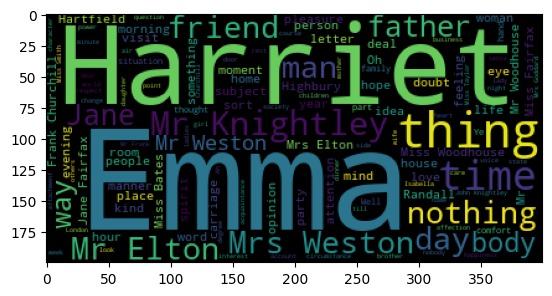

In [39]:
# 워드클라우드
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordc = WordCloud()
wordc.generate(emma_noun)
plt.imshow(wordc)
plt.show()

- 컬러맵 : https://matplotlib.org/stable/users/explain/colors/colormaps.html

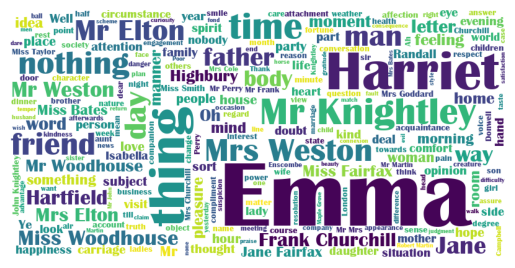

In [61]:
wordcloud = WordCloud(
    font_path='C:\Windows\Fonts\BRITANIC.TTF',
    background_color='white',
    width=800, height=400, #생성될 이미지 가로세로(픽셀)
    max_words = 300, #최대 표시 단어 갯수
    relative_scaling=0.9, #단어 빈도에 따른 크기 차이 조정
    colormap='viridis',
    max_font_size=150,
    min_font_size=10,
    #random_state=10 #랜덤값 고정
)
wordcloud.generate(emma_noun)
#plt.figure(figsize=(20,7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [67]:
# data(constitution, 헌법) 말뭉치에서 명사(NN, NNS, NNP, NNPS) 추출 → 빈도수 파악
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab
analyzer = MeCab()
#noun_list = analyzer.nouns(data) #의존명사가 많아서 NNG, NNP만 빼자
noun_list = [word for word, tag in analyzer.pos(data) if tag in ('NNG', 'NNP')]
noun_list[:10]
# data 한글 말뭉치로 워드 count
from nltk import FreqDist
noun_wordcount = FreqDist(noun_list)
import pandas as pd
wordcnt = pd.Series(noun_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt.head(10)

법률     121
대통령     84
조       79
국가      73
헌법      69
국민      69
국회      69
때       55
필요      31
위원      30
dtype: int64

명사 추출:  ['대한민국', '헌법', '역사', '전통', '국민']
워드클라우드를 그릴 data :  대한민국 헌법 역사 전통 국민 운동 


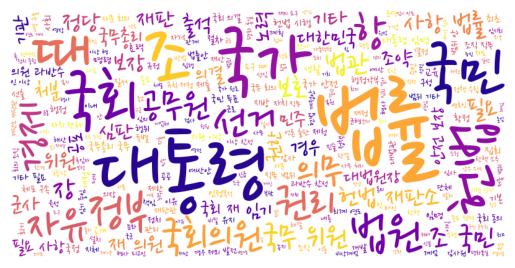

In [78]:
# → 연결 → 워드클라우드
data_noun = ' '.join(noun_list)
print('명사 추출: ', noun_list[:5])
print('워드클라우드를 그릴 data : ', data_noun[:20])
wordcloud = WordCloud(
    font_path='./data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    #relative_scaling=0.9,
    colormap='plasma',
    max_font_size=180,
    min_font_size=10
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [80]:
# 불용어(불용어지정 + 불용어사전) 처리
from wordcloud import STOPWORDS
#불용어 = STOPWORDS | {'대통령','조','항','장','때'} # | 합 집합연산자
불용어 = {'대통령','조','항','장','때'}
불용어 # 통상 거의 유일하게 이 경우에만 한글 변수를 쓴다.

{'대통령', '때', '장', '조', '항'}

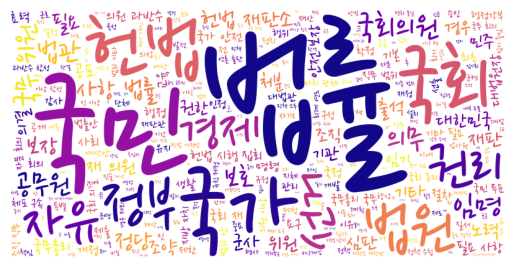

In [81]:
wordcloud = WordCloud(
    font_path='./data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    colormap='plasma',
    stopwords=불용어 #불용어 처리
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (468, 720, 3))

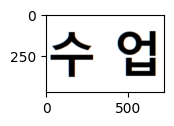

In [82]:
# 마스킹할 이미지를 넘파이 배열로 (방법 1)
import cv2
mask = cv2.imread('data/test.png')
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape #3채널 이미지

(numpy.ndarray, (468, 720, 3))

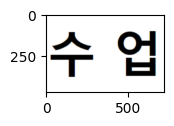

In [83]:
# 마스킹할 이미지를 넘파이 배열로 (방법 2)
from PIL import Image
import numpy as np
img = Image.open('data/test.png')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

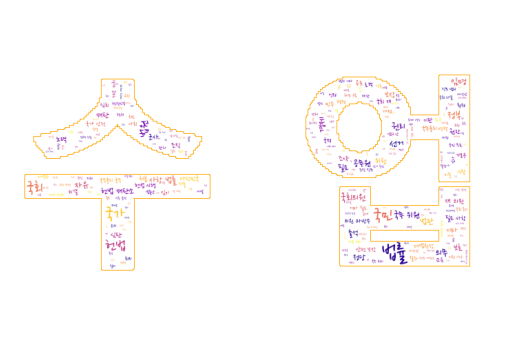

In [87]:
wordcloud = WordCloud(
    font_path='./data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    colormap='plasma',
    stopwords=불용어, #불용어 처리
    mask=mask,
    contour_color='orange',
    contour_width=1
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [93]:
# mask = cv2.imread('data/heart.jpg')
img = Image.open('data/heart.jpg')
mask = np.array(img) 
type(mask), mask.shape # 흑백이네?

(numpy.ndarray, (1600, 1600))

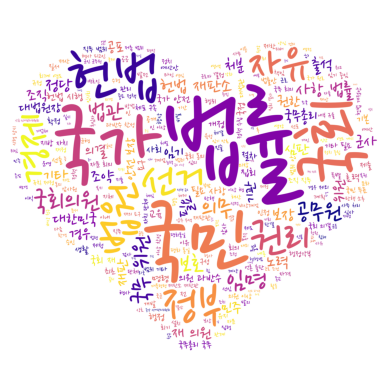

In [94]:
wordcloud = WordCloud(
    font_path='./data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    colormap='plasma',
    stopwords=불용어, #불용어 처리
    mask=mask,
#     contour_color='orange',
#     contour_width=1
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (241, 257, 3))

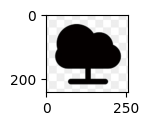

In [97]:
#투명인 척하는 컬러 이미지
img = Image.open('data/test2.jpg') 
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

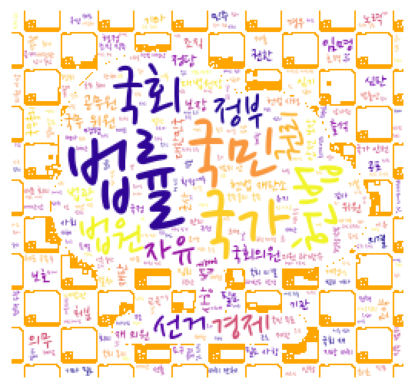

In [99]:
wordcloud = WordCloud(
    font_path='./data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    colormap='plasma',
    stopwords=불용어, #불용어 처리
    mask=mask,
    contour_color='orange',
    contour_width=1
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
# 지저분해...

mask 데이터 하나하나의 타입:  uint8
mask 데이터 하나하나의 타입:  uint8


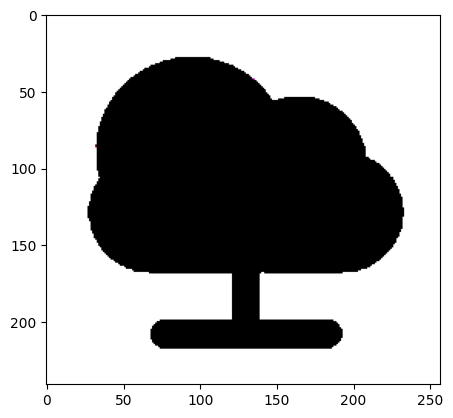

In [101]:
# 이미지 전처리 : 옅은 회색 
img = Image.open('data/test2.jpg') 
mask = np.array(img)
print('mask 데이터 하나하나의 타입: ', mask.dtype) # dtype uint8 : unassined integer 8byte
mask = np.where(mask>200, 255, 0).astype(np.uint8)
print('mask 데이터 하나하나의 타입: ', mask.dtype) # dtype uint8 : unassined integer 8byte
plt.imshow(mask)

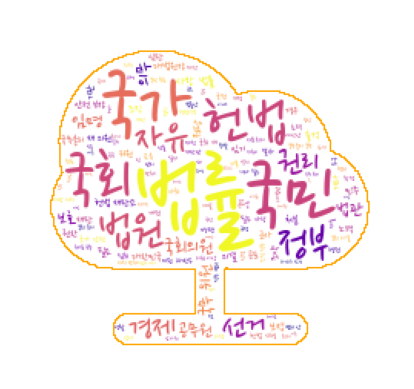

In [102]:
wordcloud = WordCloud(
    font_path='./data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    colormap='plasma',
    stopwords=불용어, #불용어 처리
    mask=mask,
    contour_color='orange',
    contour_width=1
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

(numpy.ndarray, (1124, 720))

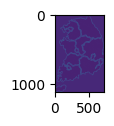

In [103]:
# 1채널 이미지
img = Image.open('data/south_korea.png')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

(numpy.ndarray, (1124, 720, 3))

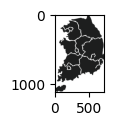

In [104]:
# 1채널 이미지 → 3채널 : convert('RGB')
img = Image.open('data/south_korea.png').convert('RGB')
mask = np.array(img)
plt.figure(figsize=(2,1))
plt.imshow(mask)
type(mask), mask.shape

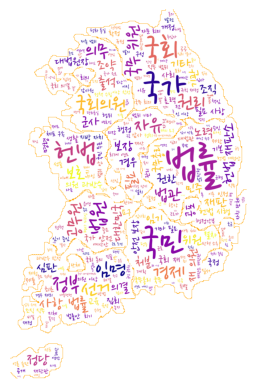

In [105]:
wordcloud = WordCloud(
    font_path='./data/NanumPenScript-Regular.ttf',
    background_color='white',
    width=800, height=400,
    max_words = 300,
    colormap='plasma',
    stopwords=불용어, #불용어 처리
    mask=mask,
    contour_color='orange',
    contour_width=1
)
wordcloud.generate(data_noun)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [106]:
# 생성된 wordcloud 저장
wordcloud.to_file('data/korea.jpg') # jpg나 npb

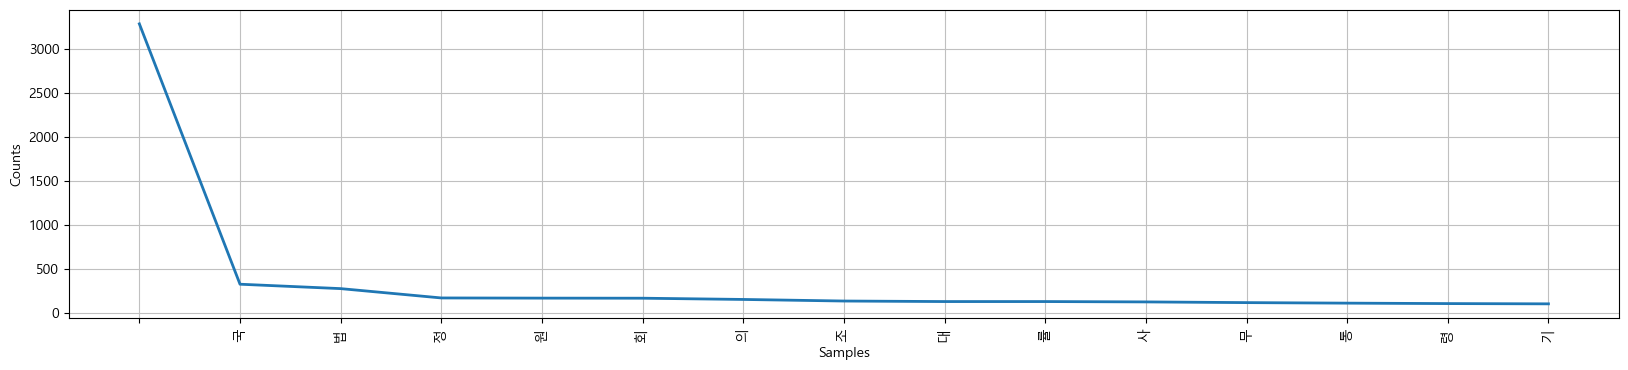

In [109]:
import nltk
plt.figure(figsize=(20,4))
data_text = nltk.Text(data_noun)
plt.rc('font', family='Malgun Gothic')
data_text.plot(15)
plt.show()